<a href="https://colab.research.google.com/github/kungfumas/aplikasi-deep-learning/blob/master/feedforward_nn_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 6.9 MB/s 
     |████████████████████████████████| 199 kB 44.7 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [ ]:
df = pd.read_csv("diabetes.csv")

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

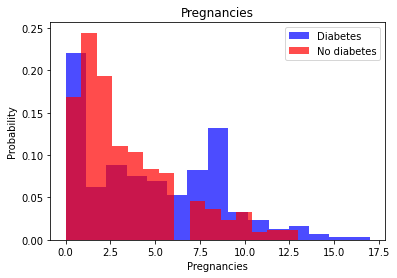

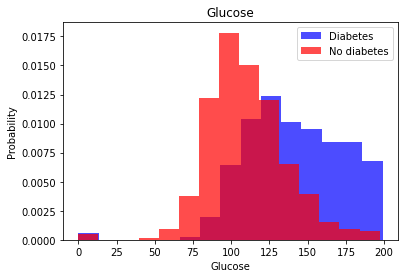

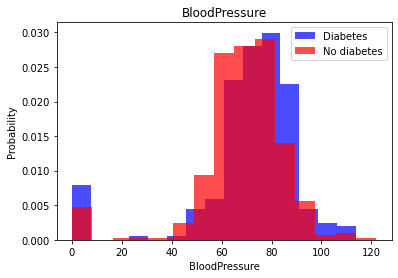

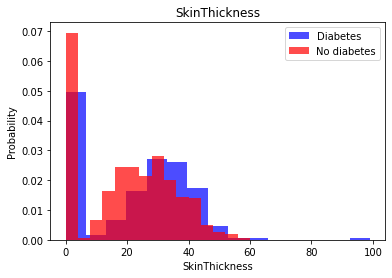

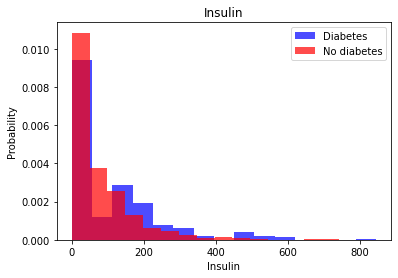

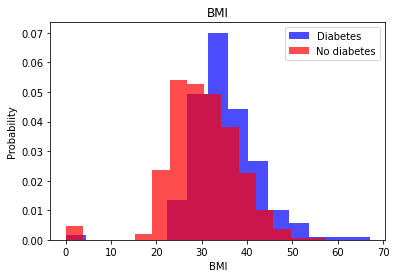

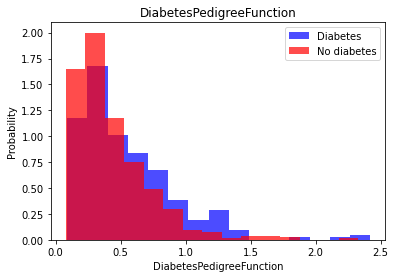

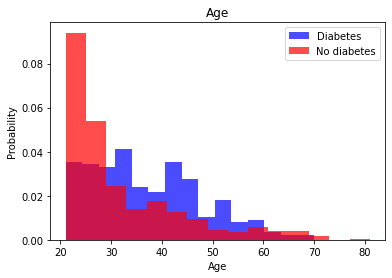

In [ ]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color='blue', label="Diabetes", alpha=0.7, density=True, bins=15)
  plt.hist(df[df['Outcome']==0][label], color='red', label="No diabetes", alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [ ]:
X.shape, y.shape

((768, 8), (768,))

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [ ]:
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [ ]:
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(16, activation='relu'), # if x <= 0 --> 0, x > 0 --> x
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.7207 - accuracy: 0.4667


[0.7206766605377197, 0.46666666865348816]

In [ ]:
model.evaluate(X_valid, y_valid)

7/7 [==============================] - 0s 2ms/step - loss: 0.7214 - accuracy: 0.4750


[0.7214173674583435, 0.4749999940395355]

In [ ]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 1s 4ms/step - loss: 0.6821 - accuracy: 0.5850 - val_loss: 0.6380 - val_accuracy: 0.6900
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6206 - accuracy: 0.6917 - val_loss: 0.5911 - val_accuracy: 0.7050
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5798 - accuracy: 0.7283 - val_loss: 0.5583 - val_accuracy: 0.7300
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5497 - accuracy: 0.7400 - val_loss: 0.5339 - val_accuracy: 0.7400
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5285 - accuracy: 0.7567 - val_loss: 0.5177 - val_accuracy: 0.7400
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5143 - accuracy: 0.7600 - val_loss: 0.5037 - val_accuracy: 0.7400
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5041 - accuracy: 0.7650 - val_loss: 0.4948 - val_accuracy: 0.7500
Epoch 8/20
38/38 [==

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.4931 - accuracy: 0.7750


[0.4930831491947174, 0.7749999761581421]